Team : Ruila PUSKAS-JUHASZ and Agathe LHOPITEAU

# Challenge SD-TSIA210

In [2]:
%matplotlib inline
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras import optimizers

### Load and investigate the Data

In [10]:
Xtrain = np.loadtxt('xtrain_challenge.csv', delimiter=',', skiprows = 1)
Ytrain = np.loadtxt('ytrain_challenge.csv', delimiter=',', skiprows = 1)
Xtest = np.loadtxt('xtest_challenge.csv', delimiter=',', skiprows = 1)

#Let's check the shape of the training sets
print(Xtrain.shape)
print(Ytrain.shape)

#Using our own training data to test
#X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = 0.20)
#print(X_train.shape,Y_train.shape)
#print(X_test.shape,Y_test.shape)

(1068504, 37)
(1068504,)


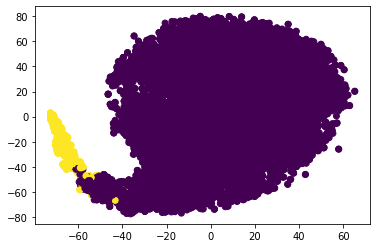

In [11]:
#Let's visualize the first 10.000 inputs of our dataset
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(Xtrain[:10000])

X,Y=[],[]
for i in range(len(X_embedded)) :
    X.append(X_embedded[i][0])
    Y.append(X_embedded[i][1])

plt.scatter(X, Y, c=Ytrain[:10000])
plt.show()

In [6]:
#Scaling the data for more efficiency during learning processes
Xtrain = preprocessing.scale(Xtrain)
Xtest = preprocessing.scale(Xtest)

### Let's try a few methods
### k-nearest neighbors

In [ ]:
############WITHOUT ENSEMBLES###################
#We fix the number of neighbors equal to 100
#clfKNN = KNeighborsClassifier(n_neighbors=100)
#clfKNN = clfKNN.fit(Xtrain, Ytrain)

#We predict the labels 
#Ypred_knn = clfKNN.predict(Xtest)

#Compute the accuracy
#accuracy_score(Ypred_knn, Y_test)


###########WITH ENSEMBLES########################
#create new a knn model
knn = KNeighborsClassifier()

#We want to test 30 different values for each neighbor
params_knn = {'n_neighbors': np.arange(1, 9)}

#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=3)

In [ ]:
#fit model to training data
knn_gs.fit(Xtrain, Ytrain)

In [ ]:
#save best model
knn_best = knn_gs.best_estimator_

#check best n_neigbors value
print(knn_gs.best_params_)

#Prepare for submission
#np.savetxt('ytest_knn.csv', Ypred_knn, fmt = '%1.0d', delimiter = ',')

In [ ]:
#Prepare for submission
ytest_knn = knn_best.predict(Xtest)
np.savetxt('ytest_knn.csv', ytest_knn, fmt = '%1.0d', delimiter = ',')

With the K-nearest neighbours method, we get a computation time of approximately 5 minutes and we get an accuracy of 0.9975245787338384, when we take 3 neighbors. 

### Deep Neural Network

In [ ]:
#2-layer NN with 4 neurones in the second layer
class NeuralNetwork:
    #initialize the NN with number of layers and random numbers of weights and biases. 
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(y.shape)
   
    #compute the output y
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
    
    #propagate the loss backwards so we can update the weight and the bias
    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2

In [ ]:
# Cast pixels from uint8 to float32
Xtrain = Xtrain.astype('float32')
Xtest = Xtest.astype('float32')

#Normalize the images so that they have zero mean and standard deviation

Xtrain = preprocessing.scale(Xtrain)
Xtest = preprocessing.scale(Xtest)



In [ ]:
#input_shape = (1068504, 37)
#output_shape = Xtrain.shape[1]

modelDNN = Sequential()
modelDNN.add(Flatten())
#modelDNN.add(Dense(output_shape, input_shape = input_shape))
#modelDNN.add(Activation('sigmoid'))
#
#output_shape = 30
#modelDNN.add(Dense(output_shape))
#modelDNN.add(Activation('softmax'))


modelDNN.add(Dense(input_dim=Xtrain.shape[1], output_dim=3, activation='sigmoid'))
modelDNN.add(Dense(input_dim=3, output_dim=Ytrain.shape[1], activation='softmax'))
modelDNN.compile(loss='categorical_crossentropy', optimizer='sgd')
modelDNN.fit(Xtrain, Ytrain, nb_epoch=10, batch_size=32, verbose=1, validation_data=None)

In [ ]:
modelDNN.compile(optimizer = optimizers.SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy']) #lr = eta

# This is where the actual training-testing happens
# Number of epochs we want to train
epochs = 10

YpredNN = modelDNN.predict(Xtrain, batch_size=32)


modelDNN.fit(Xtrain, Ytrain, batch_size=32, epochs = epochs, verbose=1)

modelDNN.summary()

Note down the performance of the larger network in terms of training and validation accuracy as a reference (save the loss/accuracy graphs of the network).

Then, experiment as follow and compare performance with the reference scenario:

*  Experiment increasing the size of the batch and compare the performance with reference.
*  Experiment replacing the sigmoid activations with Relus and note what happens.
*  Experiment with a larger architecture, for example: 
$$ (784) \rightarrow (300) \rightarrow (128) \rightarrow (84) \rightarrow (10) $$

## Random Forrest

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = 0.20)

from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(Xtrain, Ytrain)

In [ ]:
Ypred_forest = model.predict(Xtest)

In [ ]:
#Let's create our file that will be compared to Ytest
np.savetxt('ytest_challenge_LHOPITEAU.csv', Ypred_forest, fmt = '%1.0d', delimiter=',')

Using only this random forest, we have a pretty good result : accuracy of 0.998063463898. Moreover, the computing time isn't very long, so this method is pretty efficient and we decide to keep it for our ensemble learning.

### Logistic regression 

In [7]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(Xtrain, Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
Ypred_logreg = logreg.predict(Xtest)

In [9]:
#Let's create our file that will be compared to Ytest
np.savetxt('ytest_challenge_LHOPITEAU.csv', Ypred_logreg, fmt = '%1.0d', delimiter=',')

This method provides a pretty good accuracy : 0.9978, and is computed very quickly (less than 5 minutes). We thus decide to keep it for our futur ensemble learning.